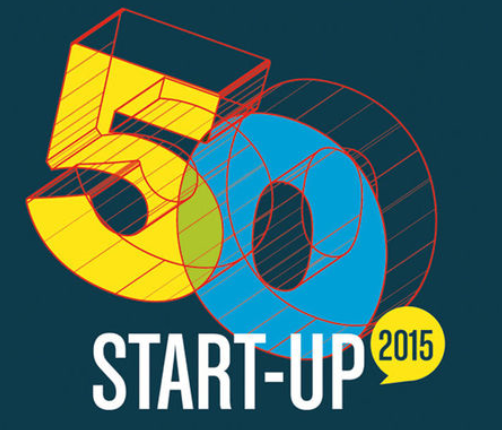



# About Dataset




#### 50 Startups' expenditures & profits

Aim of the project : We have to analysis the data expenditures vs Profit and ML prediction

Columns name :

1) R&D Spend
2) Administration
3) Marketing Spend
4) State
5) Profit

In [137]:
#Normal Library
#-----------------------
import numpy as np
import pandas as pd


#Visulization Library
#---------------------
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

#--------------------------------
#Warning library
import warnings
warnings.filterwarnings('ignore')


#anova testing
import scipy.stats as stats

#scaling the data
from sklearn.preprocessing import StandardScaler

#Train Test split
from sklearn.model_selection import train_test_split

#moving dependent variale in last column.
import movecolumn as mc
#ML model - regeression
from sklearn.linear_model import LinearRegression

#ML model - regeression - Performance matrix
from sklearn import metrics
from sklearn.metrics import r2_score,mean_absolute_percentage_error, mean_squared_error



#ML model - Classification

#ML model - Classification - Performance matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


#Improve the accuracy
from sklearn.model_selection import cross_val_score


# Importing Dataset

In [138]:
df = pd.read_csv(r"/content/50_Startups.csv")

In [139]:
df.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


Removing Duplicate Rows

In [141]:
def drop_dup(df):
    if df.duplicated().any() == True:
        df.drop_duplicates( inplace = True, Keep = "Last",reset_index = True)

        print("data after removig duplicate rows",df.duplicated().sum())
    else:
        return "No action required(No duplicate rows)"

drop_dup(df)

'No action required(No duplicate rows)'

Checking Null Values

In [142]:
print(df.isnull().sum())
print("**************************************************")
print(df.isnull().sum()/len(df)*100)

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64
**************************************************
R&D Spend          0.0
Administration     0.0
Marketing Spend    0.0
State              0.0
Profit             0.0
dtype: float64


Check unique counts

In [143]:
def check_unique_count(df):
    unique_counts = df.nunique()
    print(unique_counts)


check_unique_count(df)

R&D Spend          49
Administration     50
Marketing Spend    48
State               3
Profit             50
dtype: int64


Check unique counts data entry in columns

In [144]:
for i in df.columns:
    print(i)
    print()
    print(set(df[i].tolist()))
    print()

R&D Spend

{0.0, 66051.52, 20229.59, 119943.24, 73994.56, 15505.73, 86419.7, 64664.71, 101913.08, 142107.34, 38558.51, 542.05, 22177.74, 1315.46, 131876.9, 162597.7, 44069.95, 93863.75, 61994.48, 72107.6, 63408.86, 78389.47, 78013.11, 46014.02, 100671.96, 75328.87, 94657.16, 65605.48, 123334.88, 55493.95, 67532.53, 61136.38, 28754.33, 134615.46, 91992.39, 23640.93, 46426.07, 114523.61, 76253.86, 120542.52, 153441.51, 165349.2, 91749.16, 1000.23, 144372.41, 77044.01, 27892.92, 28663.76, 130298.13}

Administration

{110594.11, 156547.42, 135426.92, 108679.17, 144135.98, 91790.61, 118671.85, 103057.49, 118546.05, 152701.92, 127382.3, 105751.03, 101145.55, 65947.93, 122782.75, 51743.15, 139553.16, 91391.77, 82982.09, 153514.11, 153773.43, 157693.92, 145077.58, 154806.14, 85047.44, 115641.28, 96189.63, 136897.8, 129219.61, 135495.07, 153032.06, 113867.3, 127056.21, 151377.59, 99281.34, 51283.14, 127320.38, 99814.71, 84710.77, 115816.21, 148718.95, 127864.55, 182645.56, 116983.8, 122616.84, 

Outliers Check -

No outlier found as below boxplot analysis

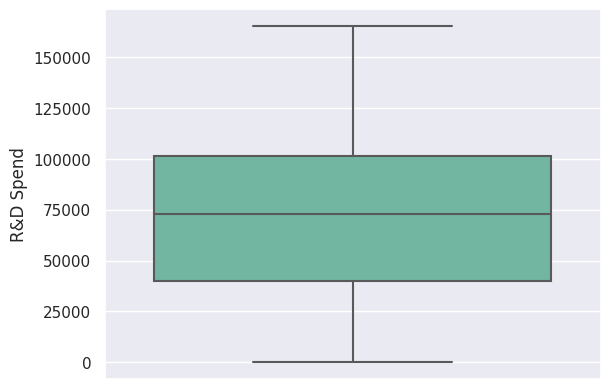

In [145]:
#  Column(A) - R&D Spend - No Outlier found

sns.boxplot(y = "R&D Spend", data = df, palette ='Set2' )
plt.show()

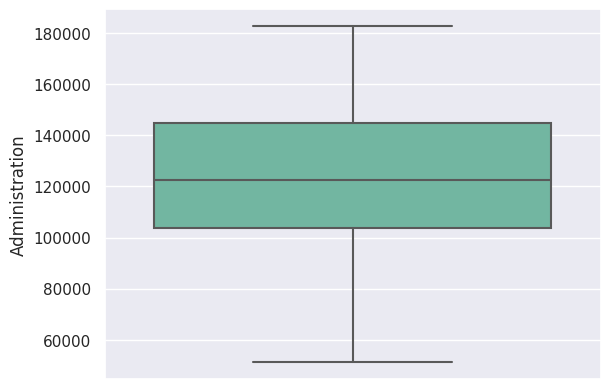

In [146]:
# Column(B) - Administration - No Outlier found

sns.boxplot(y = "Administration", data = df, palette ='Set2' )
plt.show()

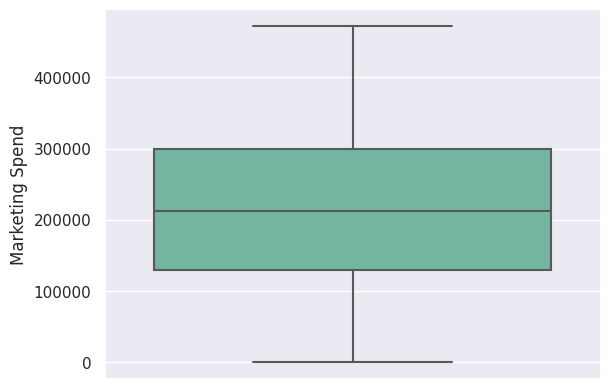

In [147]:
#Column(C) - Marketing Spend - No Outlier found

sns.boxplot(y = "Marketing Spend", data = df, palette ='Set2' )
plt.show()


Normal Distribution check -

Analysis result... Skewness is close to 0, no action required.

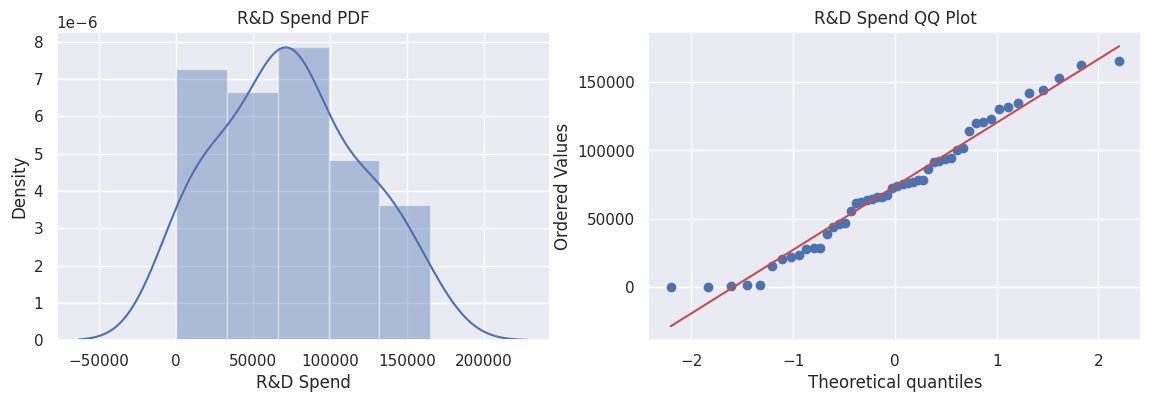

skewness of the column of area income :   0.164002172321177


In [148]:
# column(A) - R&D Spend

plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(df["R&D Spend"])
plt.title('R&D Spend PDF')



plt.subplot(122)
stats.probplot(df["R&D Spend"], dist='norm', plot=plt)
plt.title("R&D Spend QQ Plot")
plt.show()

#*************************************************
print("skewness of the column of area income :  ",df["R&D Spend"].skew())
#************************************

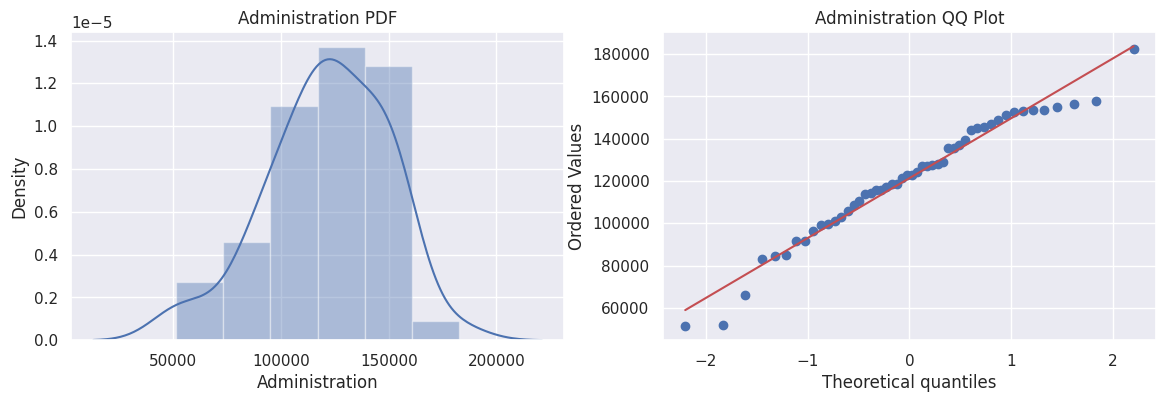

skewness of the column of Administration :   -0.4890248099671768


In [149]:
#column(B) -Administration

plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(df["Administration"])
plt.title('Administration PDF')



plt.subplot(122)
stats.probplot(df["Administration"], dist='norm', plot=plt)
plt.title("Administration QQ Plot")
plt.show()

#*************************************************
print("skewness of the column of Administration :  ",df["Administration"].skew())
#************************************

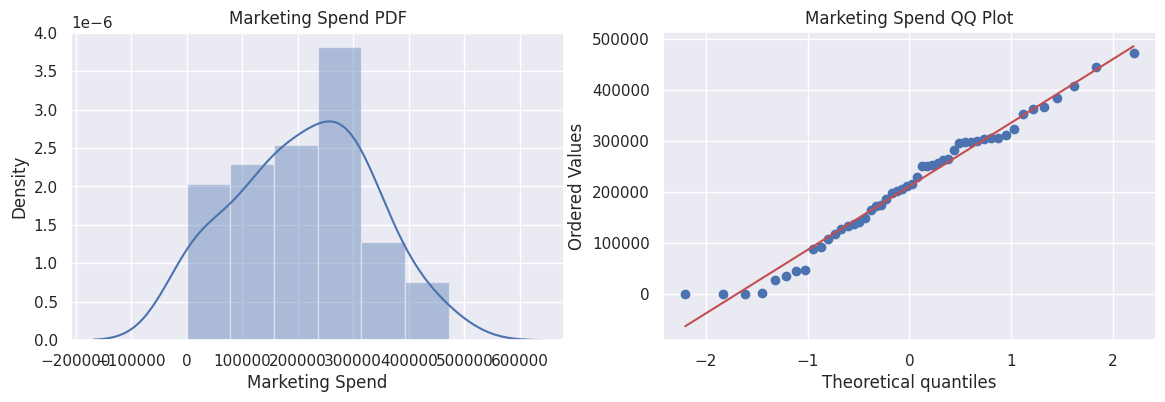

skewness of the column of Marketing Spend :   -0.04647226758360412


In [150]:
#column(C) - Marketing Spend

plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(df["Marketing Spend"])
plt.title('Marketing Spend PDF')



plt.subplot(122)
stats.probplot(df["Marketing Spend"], dist='norm', plot=plt)
plt.title("Marketing Spend QQ Plot")
plt.show()

#*************************************************
print("skewness of the column of Marketing Spend :  ",df["Marketing Spend"].skew())
#************************************



Finding correlation



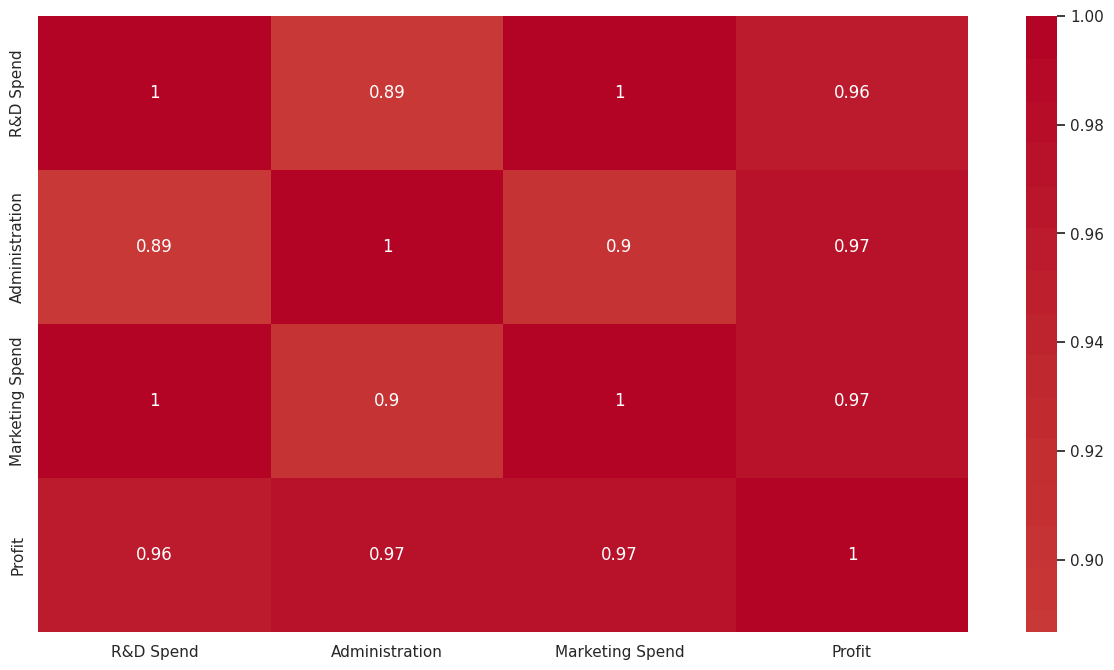

In [151]:
plt.figure(figsize=(15,8))
corr = df.describe().corr()
sns.heatmap(corr, annot=True, cmap='coolwarm',center = 0)
plt.show()

Visulization Part -A

Profit state wise

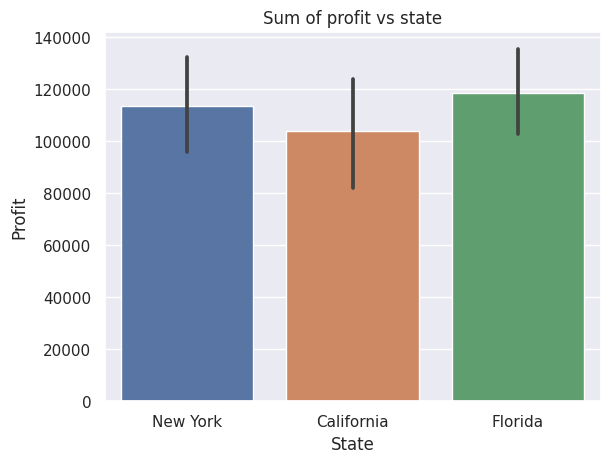

In [152]:
sns.barplot(x="State", y= "Profit", data = df)
plt.xlabel("State")
plt.ylabel("Profit")
plt.title("Sum of profit vs state")
plt.show()

Visulization part - B

Analyse for best model through Pair plot

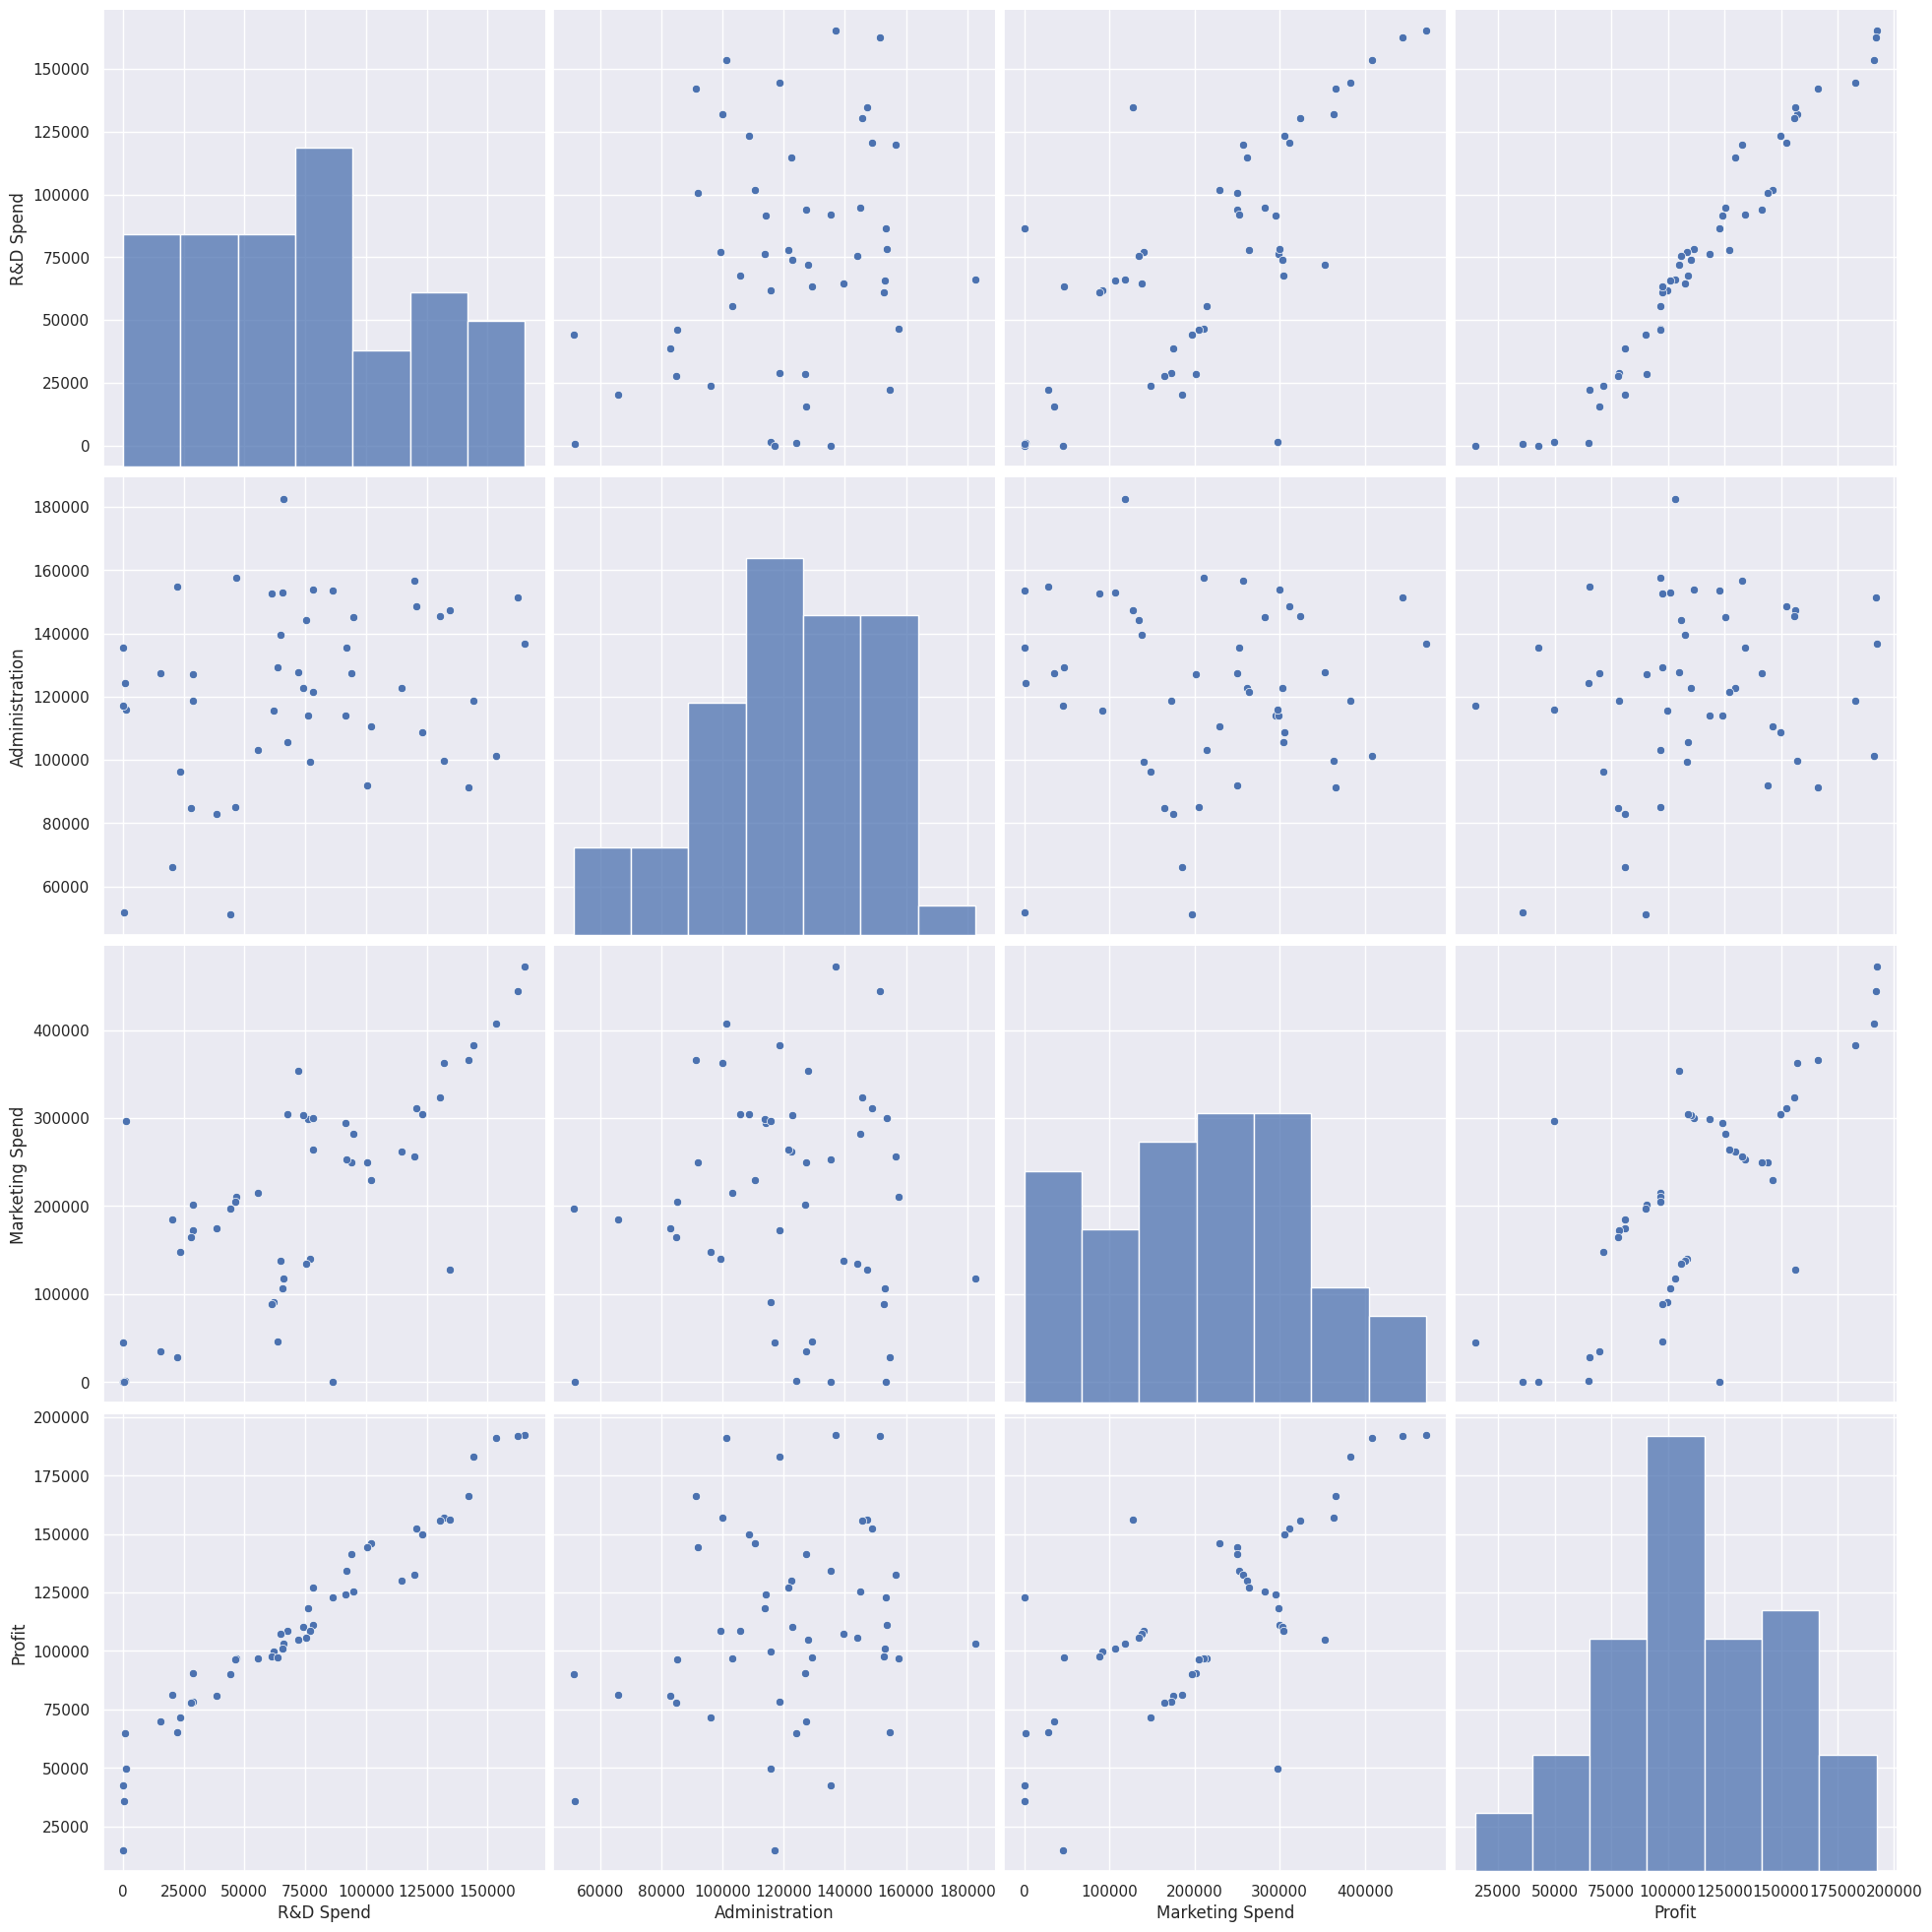

In [153]:
sns.pairplot(df, size = 5, kind = 'scatter')
plt.show()

Cheat sheat

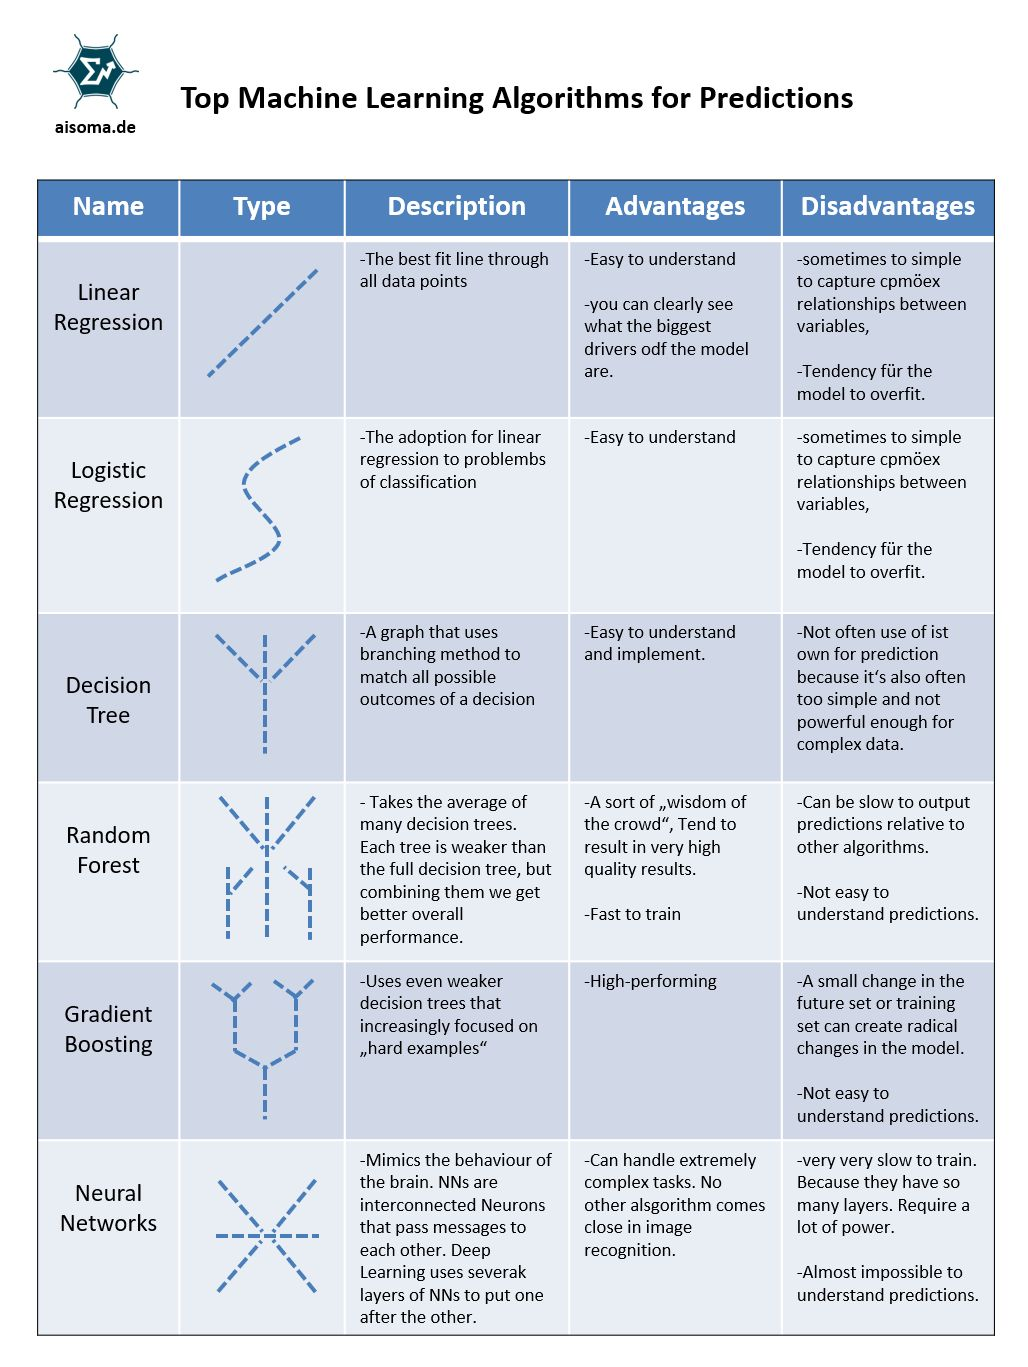

One hot Encoding concept

In [154]:
df["State"].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [155]:
df = pd.get_dummies(df, columns = ["State"],drop_first = True)

In [156]:
df

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0
5,131876.90,99814.71,362861.36,156991.12,0,1
6,134615.46,147198.87,127716.82,156122.51,0,0
7,130298.13,145530.06,323876.68,155752.60,1,0
8,120542.52,148718.95,311613.29,152211.77,0,1
9,123334.88,108679.17,304981.62,149759.96,0,0


Spliting in Dep and In-Dependent variables

In [157]:
import movecolumn as mc
mc.MoveToLast(df,'Profit')

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York,Profit
0,165349.20,136897.80,471784.10,0,1,192261.83
1,162597.70,151377.59,443898.53,0,0,191792.06
2,153441.51,101145.55,407934.54,1,0,191050.39
3,144372.41,118671.85,383199.62,0,1,182901.99
4,142107.34,91391.77,366168.42,1,0,166187.94
5,131876.90,99814.71,362861.36,0,1,156991.12
6,134615.46,147198.87,127716.82,0,0,156122.51
7,130298.13,145530.06,323876.68,1,0,155752.60
8,120542.52,148718.95,311613.29,0,1,152211.77
9,123334.88,108679.17,304981.62,0,0,149759.96


In [158]:
x = df.iloc[:,0:-1]
y = df['Profit']

Scailing the data

In [159]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_x = sc.fit_transform(x)
pd.DataFrame(sc_x)

variable = sc_x
variable.shape

(50, 5)

# Split the data into train and test


In [160]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(sc_x, y, test_size=0.2, random_state=101)

Linear regeression model

In [161]:
lr = LinearRegression()
lr.fit(x_train, y_train)

y_train_pred= lr.predict(x_train)
y_test_pred = lr.predict(x_test)


print("Train Prediction :  ", r2_score(y_train, y_train_pred))
print("Test Prediction :", r2_score(y_test, y_test_pred))




Train Prediction :   0.945849310601959
Test Prediction : 0.9493973303776394


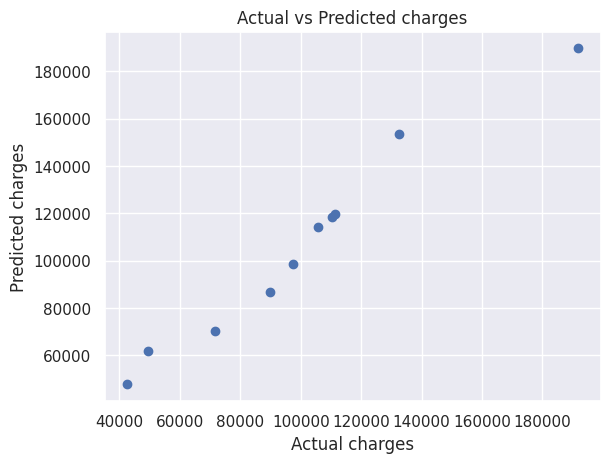

In [162]:
# Check linearity

plt.scatter(y_test, y_test_pred)

plt.xlabel("Actual charges")
plt.ylabel("Predicted charges")
plt.title("Actual vs Predicted charges")

plt.show()

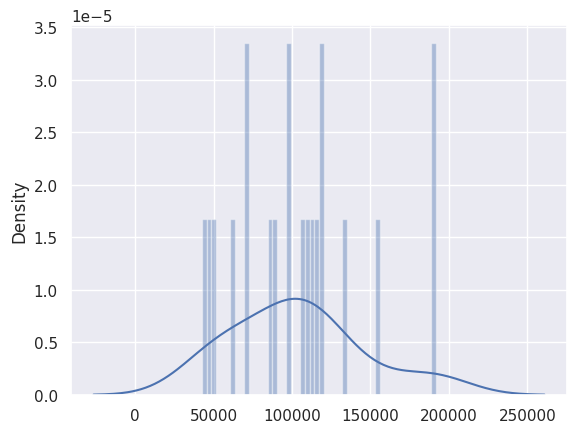

In [163]:
# Normality of Residual

sns.distplot((y_test, y_test_pred), bins=50)
plt.show()

Performance Matrix check

In [164]:
#Mean absolutr error ( MAE)

print("MAE :", metrics.mean_absolute_error(y_test, y_test_pred))

MAE : 7068.317931596443


In [165]:
# Mean Absolute Percent Error (MAPE)

print("MAPE :", metrics.mean_absolute_error(y_test, y_test_pred)/100)

MAPE : 70.68317931596442


In [166]:
## Mean Squared Error (MSE)

print("MSE :", metrics.mean_squared_error(y_test, y_test_pred))

MSE : 83628721.14289564


In [167]:
## Root Mean Squared Error (RMSE)
print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))


RMSE : 9144.874036469591


In [168]:
ACC = 100-MAPE*100
print(f'accuracy of the model = {ACC}')

accuracy of the model = 80.83386851915917
